Task 1: Prediction of heart Disease Using Knn ML

In [377]:
# importing Important libraries....
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)

In [378]:
# Data Loading into Jupyter Notebook
df = pd.read_csv(r"C:\Users\vedan\Downloads\heart.csv")
print(len(df))
df.head(6)

1025


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


##  Data Processing 

In [379]:
summary = df.describe()
summary

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [380]:
# Counting Up missing nan Value in each columnn
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

---

## EDA (exploratory data analysis)

In [381]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


#### Data insights

sex
1    713
0    312
Name: count, dtype: int64


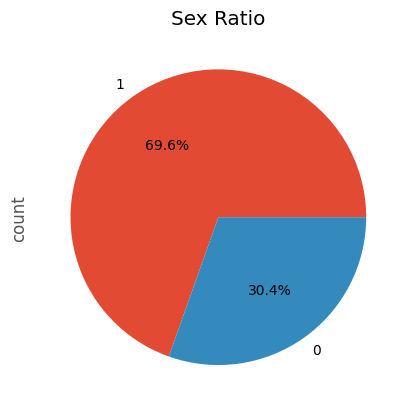

In [382]:
# sex Ratio 
sex_count = df['sex'].value_counts()
print(sex_count)
sex_count.plot(kind='pie',title='Sex Ratio', autopct='%1.1f%%')
plt.show()


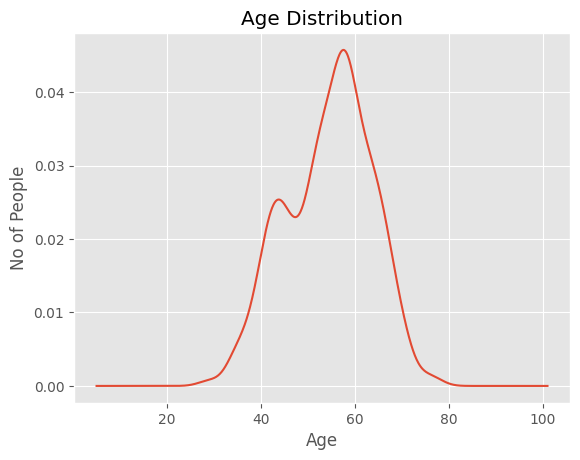

In [383]:
# Age counts

age_count = df['age'].value_counts().head(10)
age_count = pd.DataFrame(age_count)    
### Its a DataFrame Now
age_count_sorted = age_count.sort_values(by = ['age'])
# print(age_count_sorted)
# age_count_sorted.plot(kind='bar')


df['age'].plot(kind='kde')
plt.xlabel('Age')
plt.ylabel('No of People')
plt.title('Age Distribution')
plt.show()


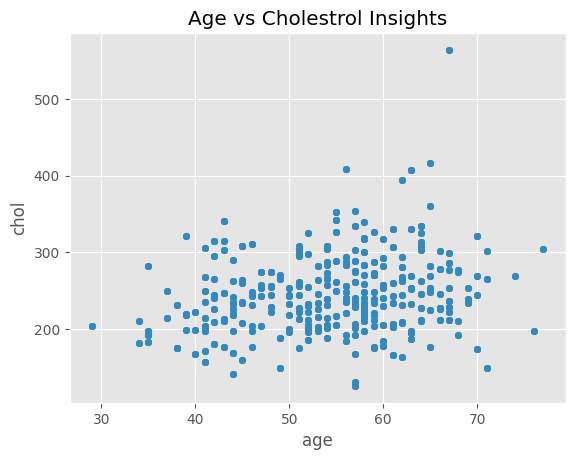

In [384]:
# age vs chol 

df.plot(kind='scatter',
       x='age',
       y='chol',
       title='Age vs Cholestrol Insights')
plt.show()

<Axes: xlabel='age', ylabel='chol'>

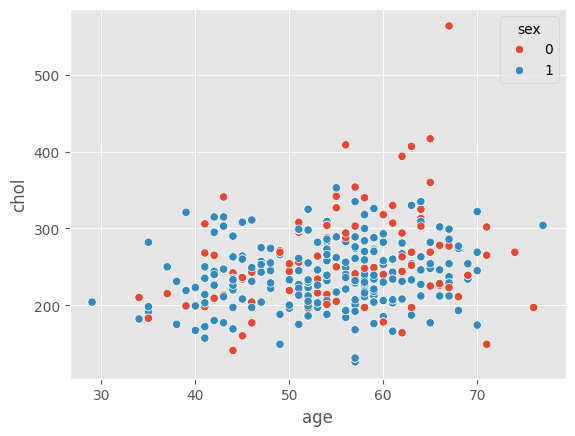

In [385]:
# Insights Using Seaborn  ( 3 Variable )
sns.scatterplot(x='age',
                y= 'chol',
               hue = 'sex',
               data = df)

---

In [386]:
attribute = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

# creating independent and Dependent Variable
X = df[attribute].copy()
y = df['target']
y

# X.head(6) 
# y.head(6)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [387]:
# Handle Missing Values
df.dropna(inplace=True)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(X)

SimpleImputer()

---

# Model Implementation ( K-Nearest Neighbor )

In [388]:
# Assuming k=5
knn = KNeighborsClassifier(n_neighbors = 5)

In [389]:
# As knn score is 1 (In Favour)

knn.fit(X,y)
knn.score(X,y)

1.0

---

# Model Evaluation (Confusion Matrix)

In [390]:
# confusion Matrix

y_PREDICTION = knn.predict(X)
cm = confusion_matrix(y,y_PREDICTION)
cm

array([[499,   0],
       [  0, 526]], dtype=int64)

In [391]:
# Printing report of the prediction

rep = classification_report(y,y_PREDICTION)
print(rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00       526

    accuracy                           1.00      1025
   macro avg       1.00      1.00      1.00      1025
weighted avg       1.00      1.00      1.00      1025



In [392]:
# f1 score = 2(precision * recall)/(precision+ recall)

f1_score_0 = 2*(1*1)/(1+1)
f1_score_1 = 2*(1*1)/(1+1)
print(f1_score_0)
print(f1_score_1)

1.0
1.0


# Showing Prediction In DataFrame

In [393]:
df['y_pred'] = y_PREDICTION
df.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,y_pred
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,1
